## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

Para el siguiente problema se puede guiar del siguiente notebook [gradiente descendiente](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/08%20-%20Gradient_Descent_Neural_Networks.ipynb)

Considere el potencial electrico entre dos cargas de la misma magnitud pero de signo opuesto medido en la posición $\vec{r}$ desde el centro de coordenadas dado por,

$$ V(\vec{r}) = \frac{q}{4\pi \epsilon_0}\Bigg[\frac{1}{|\vec{r}-\vec{r_+}|}-\frac{1}{|\vec{r}-\vec{r_-}|}\Bigg], $$

donde $\vec{r_+}$, y $\vec{r_-}$, son las posiciones de las cargas positivas y negativas respectivamente. En este ejercicio solamente nos vamos a enfocar en las dimensiones $x$ y $y$.

Dados los siguientes parametros, 

$$\vec{r_+} = (-0.25\text{ m}, 0), \quad \vec{r_-} = (0.25\text{ m}, 0), \quad \frac{q}{4\pi \epsilon_0} = 1, $$

y que el campo electrico está dado por, 

$$\vec{E}(\vec{r}) = -\vec{\nabla} V(\vec{r}),$$

a) Escriba la función potencial en términos de $x$ y $y$ e imprima los valores del potencial en el punto $(x, y) = (0, 0)$ y $(x, y) = (0.1, 0)$, $(x, y) = (-0.15, 0.12)$.

In [3]:
r_mas = np.array([-0.25,0])
r_men = np.array([0.25,0])

def Potential(x, y):
    r = np.array([x,y])
    r_mas_f = np.linalg.norm(r-r_mas)
    r_men_f = np.linalg.norm(r-r_men)
    V = ( (1/r_mas_f) - (1/r_men_f) )
    return V
    
# codigo para verificar su resultado no modificar
Potential(0, 0), Potential(0.1, 0), Potential(-0.15, 0.12)

(0.0, -3.8095238095238098, 4.007278283591919)

b) Calcule la gradiente del potencial, con la formula de derivada central.

In [23]:

def Gradient_xy(f, x, y, h):
    dx = (f((x+h),y)-f((x-h),y))/(2*h)
    dy = (f(x,(y+h))-f(x,(y-h)))/(2*h)
    
    grad = np.array([dx, dy])
    return grad

# codigo para verificar su resultado no modificar
Gradient_xy(Potential, 0, 0, 0.0001), Gradient_xy(Potential, 0.1, 0.05, 0.0001), Gradient_xy(Potential, -0.15, 0.12, 0.0001)

(array([-32.00000512,   0.        ]),
 array([-45.86693986,  11.5177336 ]),
 array([-31.72918389, -29.83684152]))

c) Empezando en el punto $(x, y) = (0, 0.15)$ implemente el algoritmo de gradiente descendiente. Con pasos 683 pasos de $e = 0.0001$ para el gradiente descendiente y $h = 0.0001$ para la derivada central. Guarde la trayectoria en la variable `trayectory`

El algoritmo gradiente descendiente tiene la siguiente forma



```
loss_function := Potential function that you wish to minimize
min_value := initial_value
e := the step size of the gradient descent
num_steps := num of times that the GD looks for the minima


for i in range(num_steps)
  min_value = min_value - e * grad_loss_function(min_value)
```

Puede seguir el siguiente [notebook](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/08%20-%20Gradient_Descent_Neural_Networks.ipynb)




In [30]:
trayectory = []
min_value = np.array([0,0.15])
e = 0.00001
num_steps = 680

for i in range(num_steps):
  min_value = min_value - e * Gradient_xy(Potential,min_value[0],min_value[1],e)
  trayectory.append(min_value)
  
# codigo para verificar su resultado no modificar
print(trayectory[-1])

[0.22671287 0.02278029]


d) Gráfique con la misma escala en x y y, las dos cargas y la trayectoria.

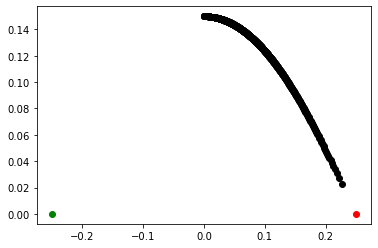

In [33]:

x=[]
y=[]

for i in trayectory:
    x.append(i[0])
    y.append(i[1])
    
plt.scatter(x,y,color='k')
plt.scatter(r_mas[0],r_mas[1],color='b')
plt.scatter(r_men[0],r_men[1],color='r')

e) ¿Qué significa físicamente la trayectoria?


**Respuesta:** Como el gradiente indica la dirección del potencial se puede observar que en este caso la trayectoria se inclina hacia la partícula que influye de menor manera el potencial en nuestra partícula inicial. Como sabemos, el potencial disminuirá en la interacción entre dos partículas de la misma, de la misma manera en este caso por eso se observa dicha trayectoria hacia la partícula con misma carga. 

Además, la trayectoria muestra esta forma parabólica dado que no se tiene en cuenta ni la velocidad o la aceleración.